In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import os

def generate_plots(df):
    
    df.index = df.index.astype(str)
    
    index_name = df.index.name if df.index.name else "Index"
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    # Loss plot
    axes[0].errorbar(df.index, df['train_loss_mean'], yerr=df['train_loss_std'], label="Train Loss", fmt='o', capsize=5, color='blue')
    axes[0].errorbar(df.index, df['val_loss_mean'], yerr=df['val_loss_std'], label="Validation Loss", fmt='s', capsize=5, color='red')
    axes[0].set_title(f"Loss over {index_name}")
    axes[0].set_xlabel(index_name)  
    axes[0].set_ylabel("Loss")
    axes[0].legend()
    axes[0].grid()

    # Accuracy plot
    axes[1].errorbar(df.index, df['train_acc_mean'], yerr=df['train_acc_std'], label="Train Accuracy", fmt='o', capsize=5, color='blue')
    axes[1].errorbar(df.index, df['val_acc_mean'], yerr=df['val_acc_std'], label="Validation Accuracy", fmt='s', capsize=5, color='red')
    axes[1].set_title(f"Accuracy over {index_name}")
    axes[1].set_xlabel(index_name)  
    axes[1].set_ylabel("Accuracy")
    axes[1].legend()
    axes[1].grid()

    plt.tight_layout()
    plt.show()

In [6]:
def aggregate_csv_files(folder_path = "./results"):
    all_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
    dataframes = []
    
    for file in all_files:
        df = pd.read_csv(os.path.join(folder_path, file))
        group_col = df.columns[0]  
        aggregated_df = df.groupby(group_col).agg(["mean", "std"]).round(3)
        aggregated_df.columns = ["_".join(col).lower() for col in aggregated_df.columns]
        dataframes.append(aggregated_df)
    
    return dataframes

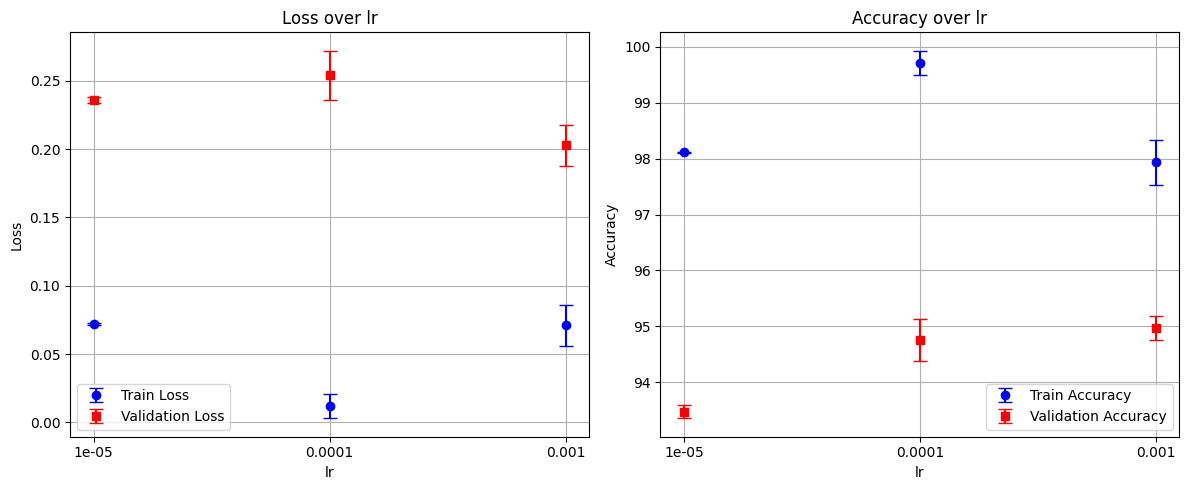

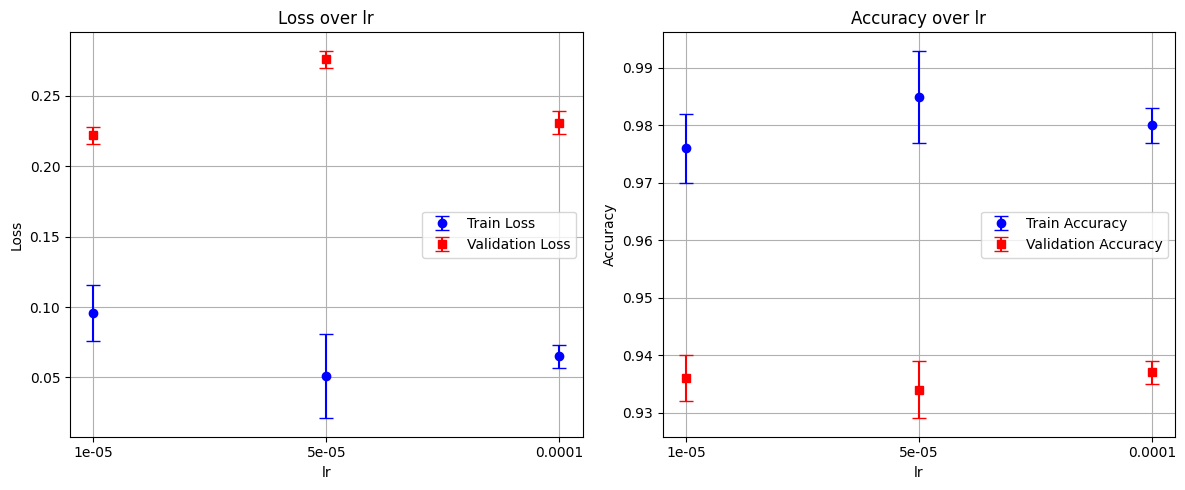

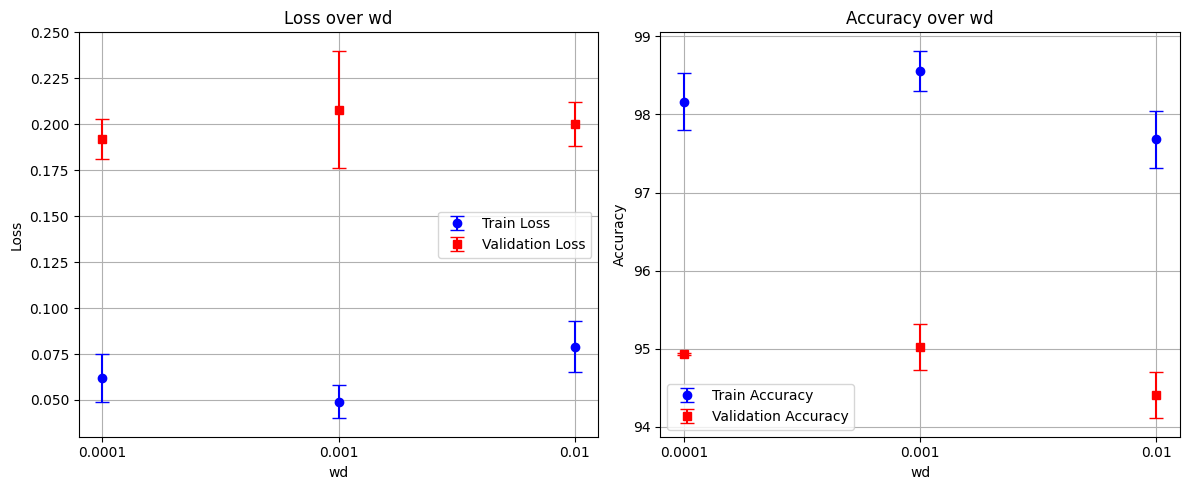

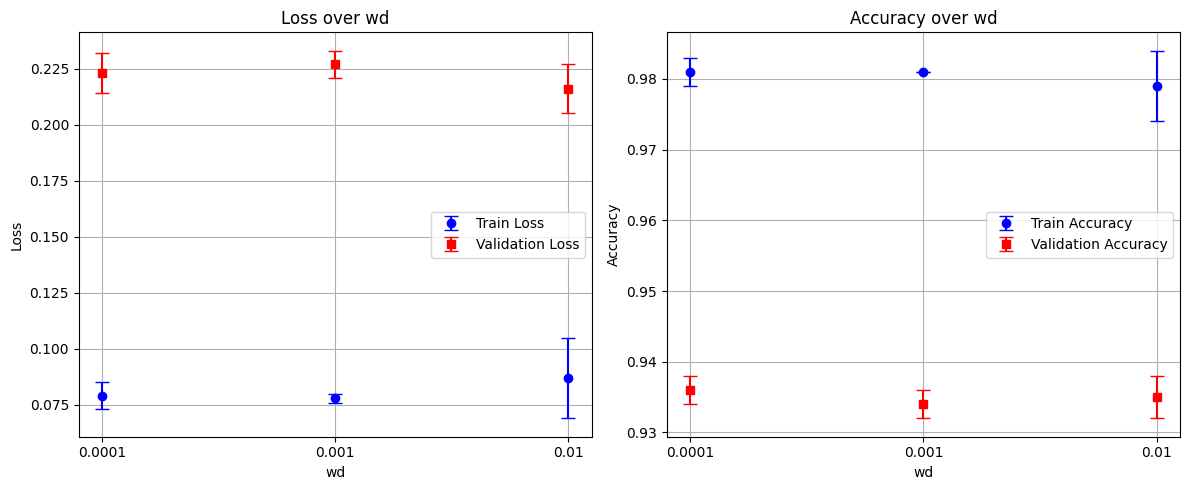

In [7]:
dfs = aggregate_csv_files()
for df in dfs:
    generate_plots(df)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_comparison(denoised_path, standard_path):
 
    denoised = pd.read_csv(denoised_path)
    standard = pd.read_csv(standard_path)

   
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    x_ticks = list(range(1, 21))
    
    axes[0].plot(standard['Epoch'], standard['Train Loss'], 'o-', label='Standard')
    axes[0].plot(denoised['Epoch'], denoised['Train Loss'], 'o-', label='Denoised')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Change of Loss for Standard and Denoised Data')
    axes[0].legend()
    axes[0].set_xlim(1, 20)
    axes[0].set_xticks(x_ticks)
    axes[0].grid(True)

    axes[1].plot(standard['Epoch'], standard['Train Acc'], 'o-', label='Train')
    axes[1].plot(standard['Epoch'], standard['Val Acc'], 'o-', label='Validation')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Training for Standard Data')
    axes[1].legend(loc='upper left')
    axes[1].set_xlim(1, 20)
    axes[1].set_xticks(x_ticks)
    axes[1].grid(True)

    axes[2].plot(denoised['Epoch'], denoised['Train Acc'], 'o-', label='Train')
    axes[2].plot(denoised['Epoch'], denoised['Val Acc'], 'o-', label='Validation')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('Validation Accuracy')
    axes[2].set_title('Training for Denoised Data')
    axes[2].legend(loc='upper left')
    axes[2].set_xlim(1, 20)
    axes[2].set_xticks(x_ticks)
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()


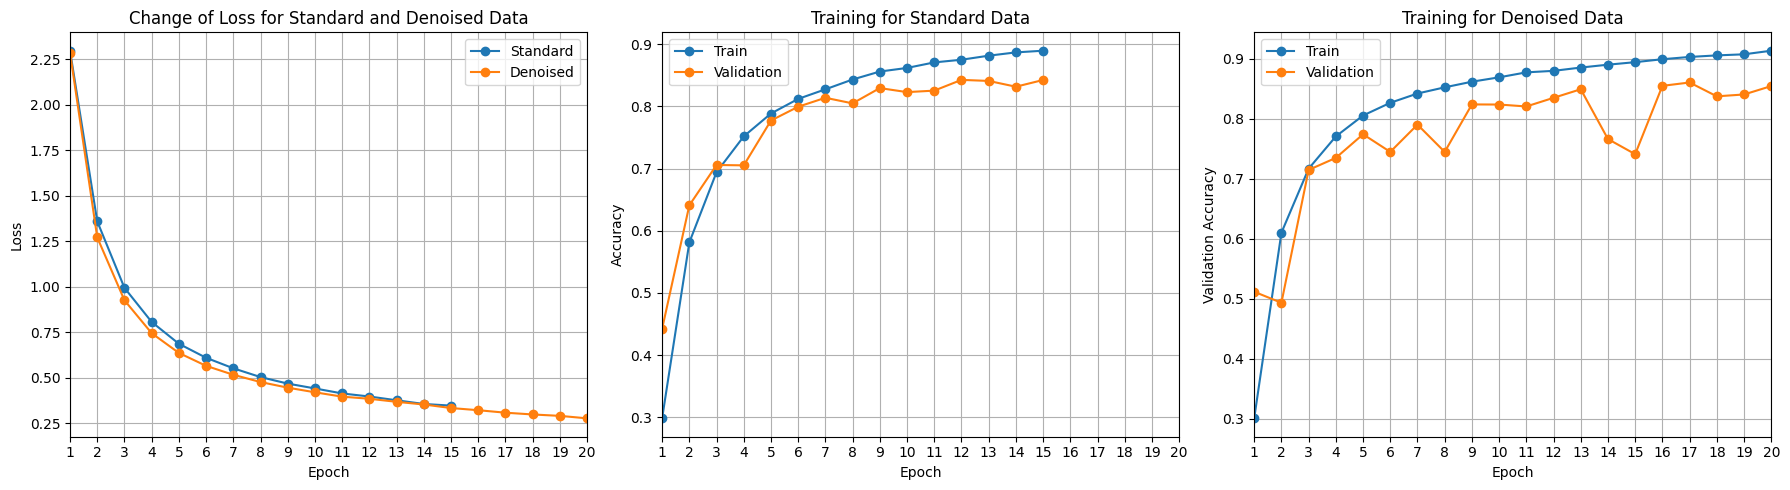

In [30]:
s_path = "training\\standard_1d_transformer.csv"
d_path = "training\\denoised_1d_transformer.csv"
plot_comparison(d_path,s_path)

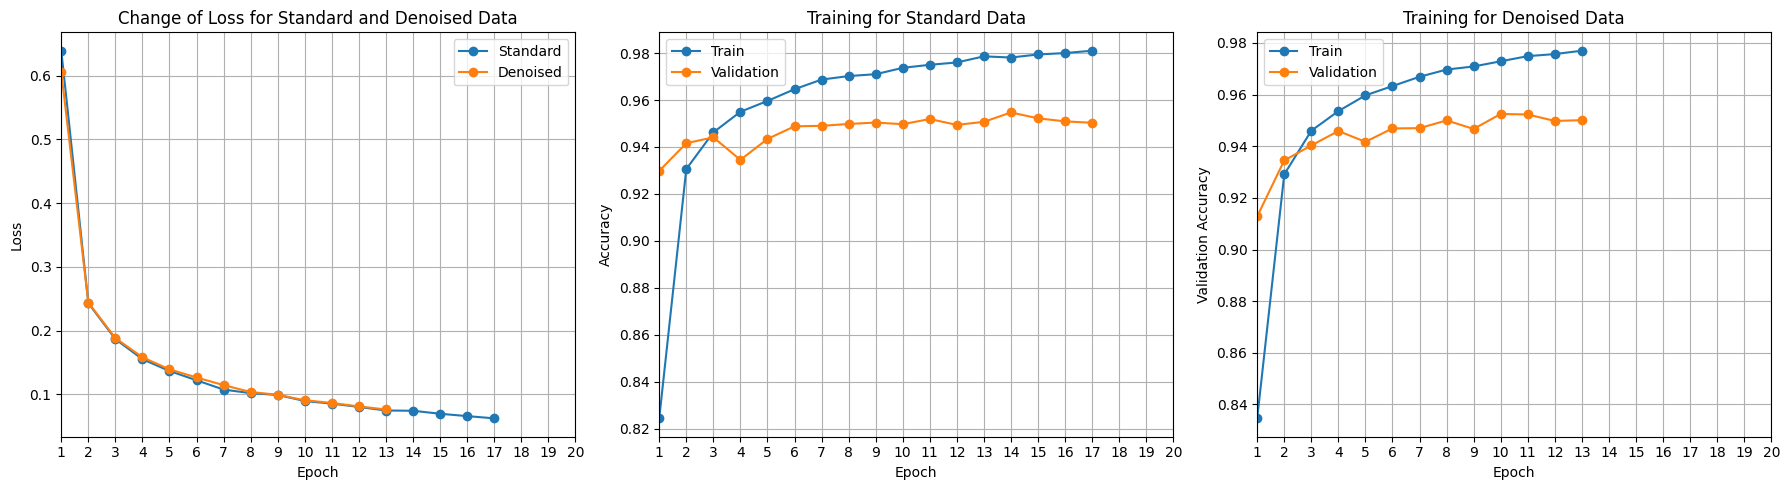

In [31]:
s_path = "training\\standard_Efficient_Net.csv"
d_path = "training\\denoised_Efficient_Net.csv"
plot_comparison(d_path,s_path)

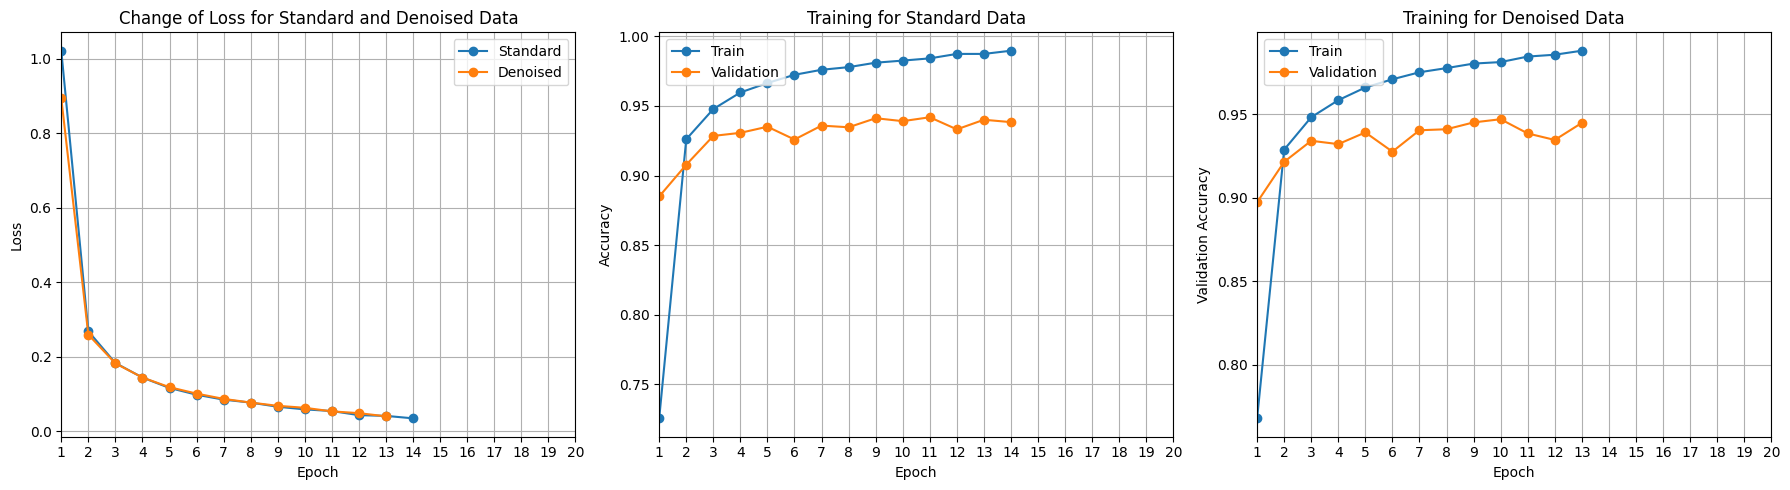

In [32]:
s_path = "training\\standard_mel_transformer.csv"
d_path = "training\\denoised_mel_transformer.csv"
plot_comparison(d_path,s_path)